### Plot contributions of individual opacity sources to the chosen limb transmission spectra

In [1]:
import warnings
from pathlib import Path

import iris
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from tqdm.notebook import tqdm as tqdm

In [2]:
from aeolus.plot import add_custom_legend

In [3]:
from util_commons import ABSORBERS, PLANETS

In [4]:
warnings.filterwarnings("ignore", module="iris")
warnings.filterwarnings("ignore", module="aeolus")
rcParams["mathtext.default"] = "regular"

In [5]:
# Project
planet = "wasp96b"
path_to_project = Path.home() / "projects" / planet
# Absorbers
absrbrs = [
    "all",
    # "h2_h2_cia",
    # "h2_he_cia",
    # "li",
    # "na",
    # "k",
    # "rb",
    # "cs",
    "ch4",
    "co",
    "co2",
    "h2o",
    "hcn",
    "nh3",
]

In [6]:
# Load combined resolution UM transmission spectra
path_to_combores = Path.cwd() / "processed" / "transpec_combores"
combores = {}
for exp in ["equilibrium", "kinetics"]:
    combores[exp] = {}
    for mdh in ["mdh0", "mdh1"]:
        combores[exp][mdh] = {}
        for absrbr in tqdm(absrbrs):
            combores[exp][mdh][absrbr] = {}
            for limb in ["full", "morning", "evening"]:
                combores[exp][mdh][absrbr][limb] = {}
                fname_combores = (
                    f"um_{planet}_{exp[0:3]}_{mdh}_transpec_combores_{absrbr}_{limb}.nc"
                )
                cb_combores = iris.load_cube(path_to_combores / fname_combores)
                combores[exp][mdh][absrbr][limb] = cb_combores

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

In [7]:
def plt_transpec_contribs(absrbrs, wl_range, limb):
    """Plot contributions of individual opacity sources to the chosen limb transmission spectra."""
    plt_absrbrs = absrbrs
    if wl_range == "02_12":
        xmin, xmax = 0.2, 12
        xticks = np.concatenate(
            [
                np.array([0.2, 0.4, 0.6, 0.8]),
                np.array([1, 1.4]),
                np.array([2, 3, 4, 6, 8, 10, 12]),
            ]
        )
    if wl_range == "02_30":
        xmin, xmax = 0.2, 30
        xticks = np.concatenate(
            [
                np.array([0.2, 0.4, 0.6, 0.8]),
                np.array([1, 1.4]),
                np.array([2, 3, 4, 6, 8, 10, 15, 20, 30]),
            ]
        )
    fig, axs = plt.subplots(
        nrows=6, ncols=1, figsize=(10, 16), sharey=True, constrained_layout=True
    )
    for exp, exp_ls in zip(["equilibrium", "kinetics"], ["dashed", "solid"]):
        for mdh, mdh_lw in zip(["mdh0", "mdh1"], [2, 1]):
            for absrbr, ax in zip(plt_absrbrs[1:], axs.flatten()):
                plt_combores_all = combores[exp][mdh]["all"][limb]
                plt_combores = combores[exp][mdh][absrbr][limb]
                plt_x_combores = (
                    combores[exp][mdh][absrbr][limb].coord("spectral_band_centres").points * 1e6
                )  # micrometers
                ax.plot(
                    plt_x_combores,
                    plt_combores_all.data,
                    linestyle=exp_ls,
                    linewidth=mdh_lw,
                    color=ABSORBERS["all"]["color"],
                )
                ax.plot(
                    plt_x_combores,
                    plt_combores.data,
                    linestyle=exp_ls,
                    linewidth=mdh_lw,
                    color=ABSORBERS[absrbr]["color"],
                )
    fig.suptitle(f'{PLANETS[planet]["tex"]} simulated transmission spectra')
    axs[0].set_title(f"{limb.capitalize()} limb", loc="center")
    axs[3].set_xlabel("Wavelength [$\mu$m]")
    axs[0].set_ylabel("$(R_p/R_s)^2$ [ppm]")
    for ax in axs.flatten():
        ax.set_xscale("log")
        ax.set_xlim(xmin, xmax)
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticks)
        ax.set_ylabel("$(R_p/R_s)^2$ [ppm]")
    # Legends
    exp_dict = {
        "Equilibrium": {"color": "k", "ls": "dashed", "lw": 1},
        "Kinetics": {"color": "k", "ls": "solid", "lw": 1},
    }
    mdh_dict = {
        "[M/H]=0": {"color": "k", "ls": "solid", "lw": 2},
        "[M/H]=1": {"color": "k", "ls": "solid", "lw": 1},
    }
    absrbr_dict_ch4 = {
        "All": {"color": ABSORBERS["all"]["color"], "ls": "solid", "lw": 1},
        "$CH_4$": {"color": ABSORBERS["ch4"]["color"], "ls": "solid", "lw": 1},
    }
    absrbr_dict_co = {
        "All": {"color": ABSORBERS["all"]["color"], "ls": "solid", "lw": 1},
        "$CO$": {"color": ABSORBERS["co"]["color"], "ls": "solid", "lw": 1},
    }
    absrbr_dict_co2 = {
        "All": {"color": ABSORBERS["all"]["color"], "ls": "solid", "lw": 1},
        "$CO_2$": {"color": ABSORBERS["co2"]["color"], "ls": "solid", "lw": 1},
    }
    absrbr_dict_h2o = {
        "All": {"color": ABSORBERS["all"]["color"], "ls": "solid", "lw": 1},
        "$H_2O$": {"color": ABSORBERS["h2o"]["color"], "ls": "solid", "lw": 1},
    }
    absrbr_dict_hcn = {
        "All": {"color": ABSORBERS["all"]["color"], "ls": "solid", "lw": 1},
        "$HCN$": {"color": ABSORBERS["hcn"]["color"], "ls": "solid", "lw": 1},
    }
    absrbr_dict_nh3 = {
        "All": {"color": ABSORBERS["all"]["color"], "ls": "solid", "lw": 1},
        "$NH_3$": {"color": ABSORBERS["nh3"]["color"], "ls": "solid", "lw": 1},
    }
    add_custom_legend(
        axs[0],
        exp_dict,
        frameon=False,
        title="Chemical scheme:",
        alignment="left",
        loc="center left",
    )
    add_custom_legend(
        axs[0],
        mdh_dict,
        frameon=False,
        title="Metallicity:",
        alignment="left",
        loc="lower left",
    )
    add_custom_legend(
        axs[0],
        absrbr_dict_ch4,
        frameon=False,
        alignment="left",
        title="Opacity sources:",
        loc="lower center",
    )
    add_custom_legend(
        axs[1],
        absrbr_dict_co,
        frameon=False,
        alignment="left",
        title="Opacity sources:",
        loc="lower left",
    )
    add_custom_legend(
        axs[2],
        absrbr_dict_co2,
        frameon=False,
        alignment="left",
        title="Opacity sources:",
        loc="lower left",
    )
    add_custom_legend(
        axs[3],
        absrbr_dict_h2o,
        frameon=False,
        alignment="left",
        title="Opacity sources:",
        loc="lower left",
    )
    add_custom_legend(
        axs[4],
        absrbr_dict_hcn,
        frameon=False,
        alignment="left",
        title="Opacity sources:",
        loc="lower left",
    )
    add_custom_legend(
        axs[5],
        absrbr_dict_nh3,
        frameon=False,
        alignment="left",
        title="Opacity sources:",
        loc="lower left",
    )
    axs[0].legend(frameon=False)
    axs[1].legend(frameon=False)
    axs[2].legend(frameon=False)
    axs[3].legend(frameon=False)
    axs[4].legend(frameon=False)
    axs[5].legend(frameon=False)
    figname_png = f"{planet}_transpec_wl{wl_range}_combores_contribs_to_{limb}.png"
    figname_pdf = f"{planet}_transpec_wl{wl_range}_combores_contribs_to_{limb}.pdf"
    fig.savefig(path_to_project / "transmission" / figname_png, dpi=200)
    fig.savefig(path_to_project / "transmission" / figname_pdf, format="pdf", bbox_inches="tight")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


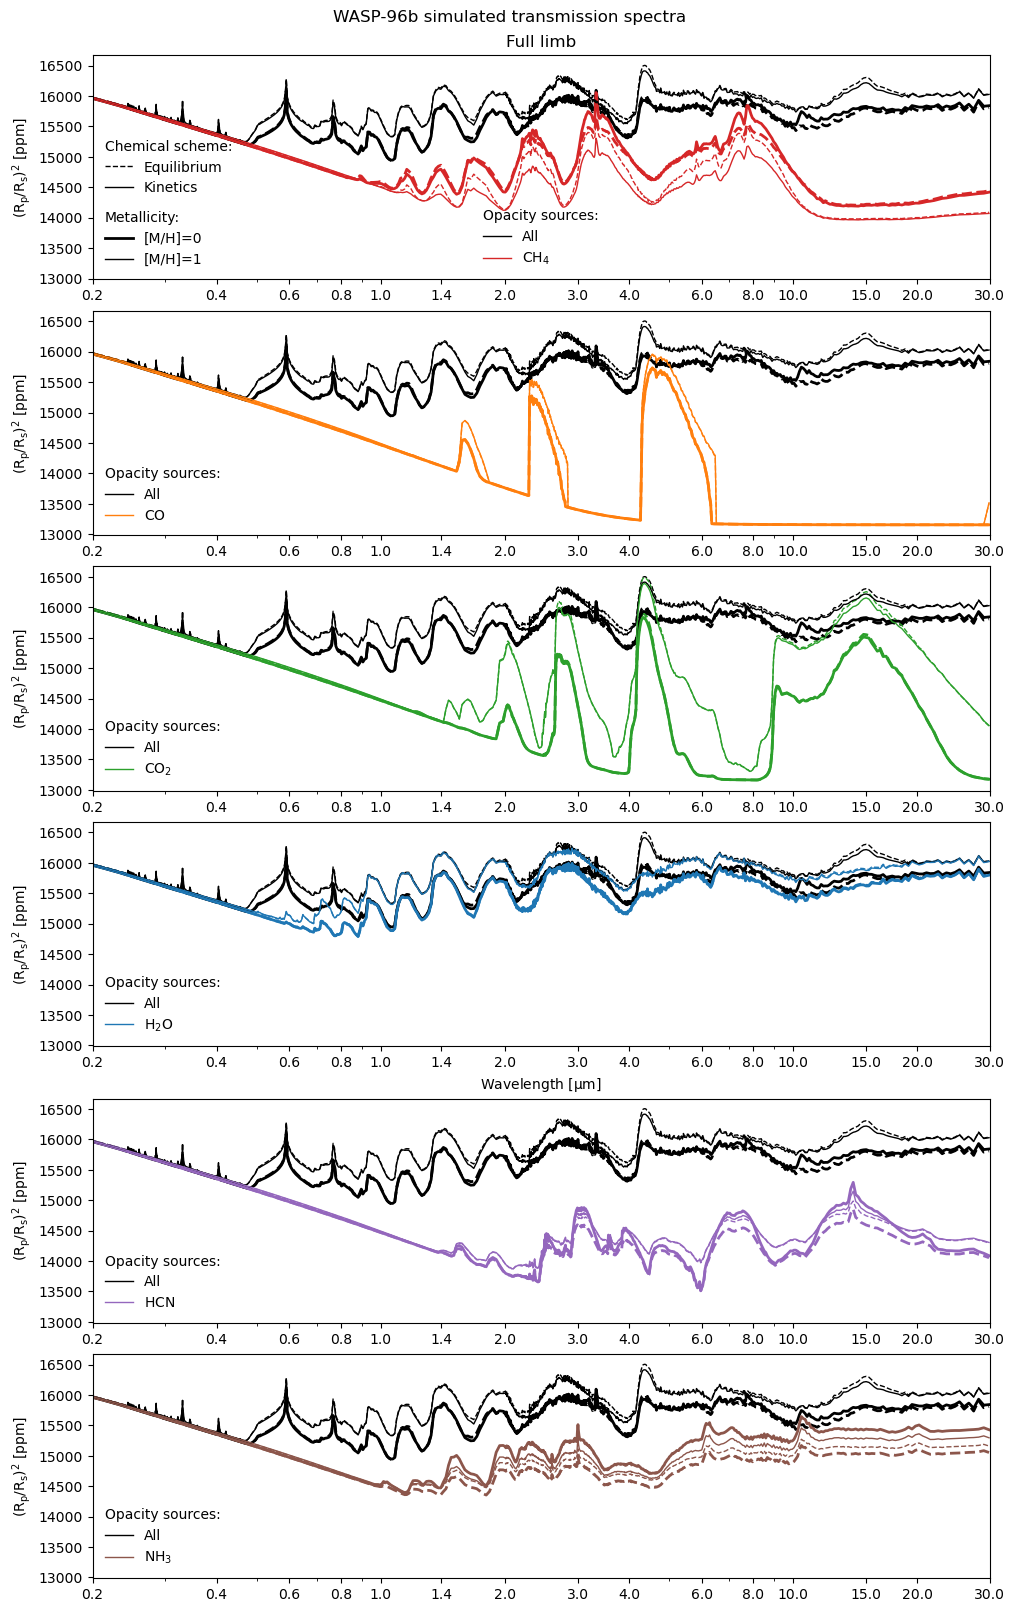

In [8]:
plt_transpec_contribs(absrbrs, "02_30", "full")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


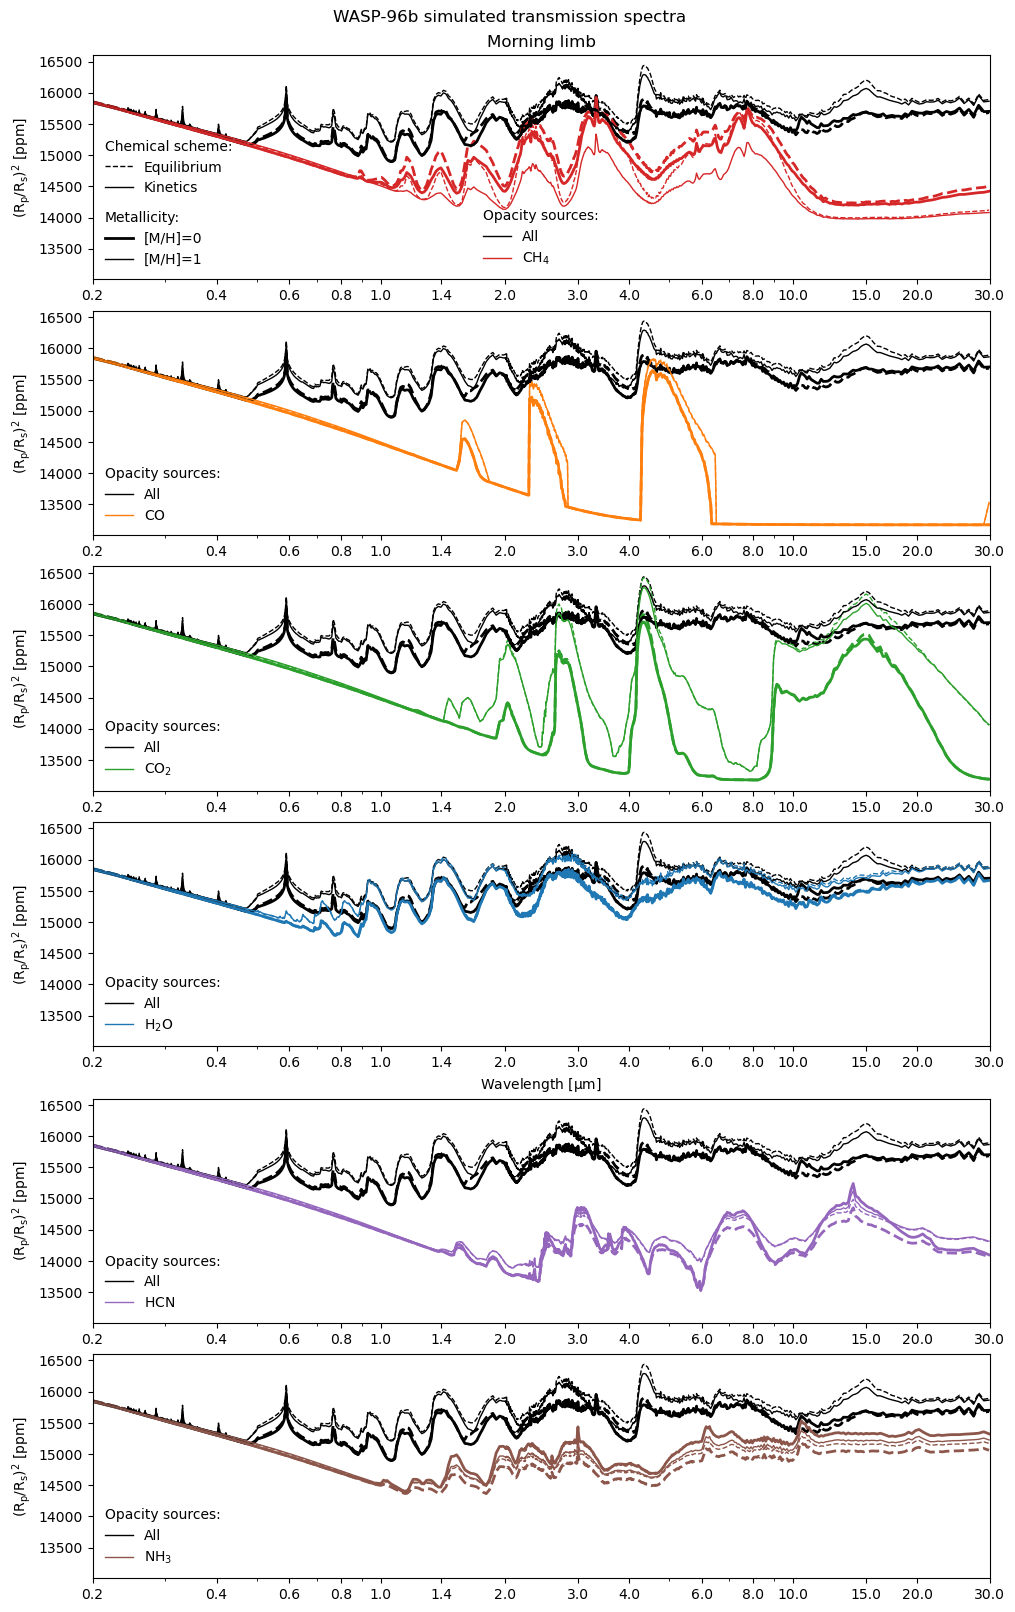

In [9]:
plt_transpec_contribs(absrbrs, "02_30", "morning")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


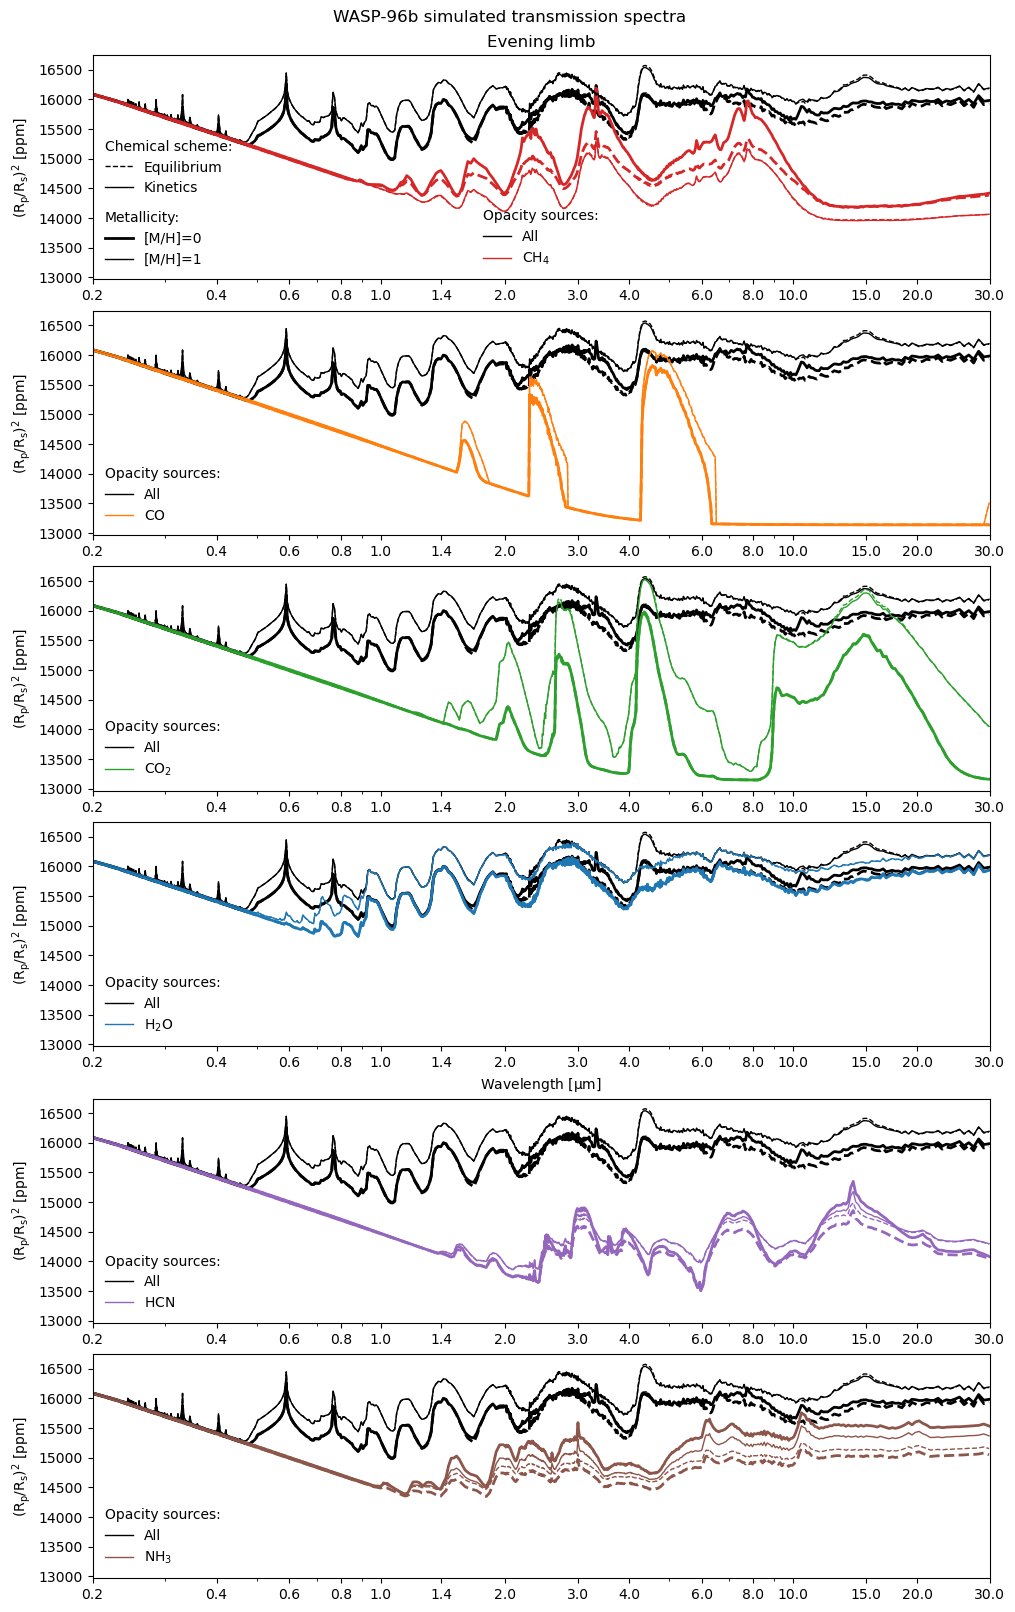

In [10]:
plt_transpec_contribs(absrbrs, "02_30", "evening")